## Github - https://github.com/mr-aditt/Data-Warehousing-and-Data-Mining 

In [4]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("crx.data",header = None)
print("Data Shape:=",data.shape)

columnnames = ['A'+ str(col) for col in range(1,17)]

data.columns=columnnames
data.isnull().count()

A1     690
A2     690
A3     690
A4     690
A5     690
A6     690
A7     690
A8     690
A9     690
A10    690
A11    690
A12    690
A13    690
A14    690
A15    690
A16    690
dtype: int64

In [25]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [34]:
# Replace ? with nan
data = data.replace('?',np.nan)

# Finding datatypes of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [40]:
# Typecast some columns to their correct type
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

# Encode column A16 from 1,0 to +,-
data['A16'] = data['A16'].map({'+':1,'-':0})

# Finding categorical variables
cat_columns = [col for col in data.columns if data[col].dtype == 'O']

# Finding numerical variables
num_columns = [col for col in data.columns if data[col].dtype != 'O']

In [43]:
data = pd.read_csv("loan.csv")
data.head()

### Continous Variable

In [49]:
data['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

In [50]:
data['interest']

0       15.4840
1       11.2032
2        8.5100
3        5.8656
4       18.7392
         ...   
9995    11.0019
9996    10.4923
9997     8.4364
9998    13.6409
9999    17.1456
Name: interest, Length: 10000, dtype: float64

### Discrete Variable

In [51]:
data['number_open_accounts'].unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

In [52]:
# Binary variable
data['target'].unique()

array([0, 1], dtype=int64)

In [54]:
data['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [57]:
data[['date_issued','date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [59]:
# Typecase to date
data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])
data.head()

In [63]:
# Extract month from date
data['Month'] = data['date_issued_dt'].dt.month
# Extract year from date
data['Year'] = data['date_issued_dt'].dt.year
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt,Month,Year
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013-06-11,2016-01-14,6,2013
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014-05-08,2016-01-25,5,2014
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013-10-26,2014-09-26,10,2013
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015-08-20,2016-01-26,8,2015
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014-07-22,2016-01-11,7,2014


### Plotting 

In [64]:
import matplotlib.pyplot as plt

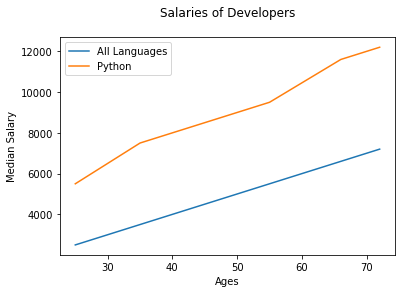

In [75]:
ages = [25,35,45,55,66,72]
dev_sal = [2500,3500,4500,5500,6600,7200]
py_sal = [5500,7500,8500,9500,11600,12200]

plt.title("Salaries of Developers\n")
plt.xlabel("Ages")
plt.ylabel("Median Salary")
plt.plot(ages,dev_sal, label = 'All Languages')
plt.plot(ages,py_sal, label = 'Python')
plt.legend()